<a href="https://colab.research.google.com/github/kwuan95/Curso_profesional_de_ML_con_Scikit_Learn/blob/master/Proyecto_predictor_de_Ingresos_JSRR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Extracion de la data y limpieza

In [ ]:
import pandas as pd

# https://archive.ics.uci.edu/dataset/20/census+income
ruta_del_archivo = '/content/adult_data.csv'

In [ ]:
# Cargamos el conjunto de datos en un DataFrame y asignamos los nombres de las columnas
df = pd.read_csv(ruta_del_archivo)
df = df.drop(df.columns[0], axis=1)
df.columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','object'
]

# Mostramos 10 ejemplos aleatorios
df.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,object
13515,45,Local-gov,364563,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,>50K
5030,63,Self-emp-not-inc,147589,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,30,United-States,>50K
11123,47,Self-emp-not-inc,109421,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,<=50K
16989,32,Private,94041,Assoc-voc,11,Never-married,Craft-repair,Not-in-family,White,Male,0,0,44,Ireland,<=50K
17490,19,Private,168693,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,25,United-States,<=50K
1415,32,Private,86723,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,52,United-States,<=50K
20167,60,Self-emp-not-inc,135285,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
12529,39,Private,192251,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,>50K
18937,44,Federal-gov,244054,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Male,0,0,60,United-States,>50K
12077,25,Private,632834,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K


In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
object            object
dtype: object

In [ ]:
conteo_nulos = df.isnull().sum()
conteo_nulos

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
object            0
dtype: int64

## Tranformacion de la data para el modelo

In [ ]:
df['object'] = df['object'].str.replace('[ =50K]', '', regex=True)

# Convertir '<' a 0 y '>' a 1 en la columna 'object'
df['object'] = df['object'].map({'<': 0, '>': 1})

# Mostramos las primeras 5 filas del DataFrame después de la transformación
print(df['object'].unique())

[0 1]


In [ ]:
df['object'].value_counts()

0    24719
1     7841
Name: object, dtype: int64

### Haciendo oversampling para emparejar la variable objetivo

In [ ]:
from sklearn.utils import resample

# Separar las instancias de cada clase
df_clase_0 = df[df['object'] == 0]
df_clase_1 = df[df['object'] == 1]

# Sobremuestrear la clase minoritaria (clase 1) para igualar el número de instancias de la clase mayoritaria (clase 0)
df_clase_1_sobremuestreado = resample(df_clase_1, replace=True, n_samples=len(df_clase_0), random_state=42)

# Combinar el subconjunto de la clase 1 sobremuestreado con la clase 0
df_equilibrado = pd.concat([df_clase_0, df_clase_1_sobremuestreado])

# Verificar la distribución de clases después del sobremuestreo
print(df_equilibrado['object'].value_counts())

0    24719
1    24719
Name: object, dtype: int64


In [ ]:
# Crear una copia del DataFrame para evitar cambios en el original
df_modelo = df_equilibrado.copy()

# Convertir variables categóricas con one-hot encoding
df_modelo = pd.get_dummies(df_modelo, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

# Mostrar las primeras 5 filas del DataFrame después de la transformación
df_modelo.dtypes

age                                int64
fnlwgt                             int64
education-num                      int64
capital-gain                       int64
capital-loss                       int64
                                   ...  
native-country_ Thailand           uint8
native-country_ Trinadad&Tobago    uint8
native-country_ United-States      uint8
native-country_ Vietnam            uint8
native-country_ Yugoslavia         uint8
Length: 109, dtype: object

In [ ]:
df_modelo.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,object,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
count,49438.000000,4.943800e+04,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,...,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000
mean,40.450241,1.899433e+05,10.591023,2022.226061,126.681844,42.116388,0.500000,0.044399,0.035418,0.070169,...,0.000951,0.002832,0.000384,0.002407,0.002063,0.000485,0.000526,0.901634,0.001659,0.000607
std,12.916806,1.058465e+05,2.611550,10415.028686,484.246479,12.087830,0.500005,0.205982,0.184836,0.255434,...,0.030819,0.053140,0.019601,0.049003,0.045376,0.022028,0.022927,0.297811,0.040693,0.024627
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,1.186930e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,40.000000,1.777930e+05,10.000000,0.000000,0.000000,40.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,49.000000,2.362450e+05,13.000000,0.000000,0.000000,48.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Entrenando el modelo usando Random Forest

                        Caracteristica  Importancia
0                                  age     0.153697
1                               fnlwgt     0.139872
33  marital-status_ Married-civ-spouse     0.094359
5                       hours-per-week     0.078887
3                         capital-gain     0.066674
2                        education-num     0.062591
53               relationship_ Husband     0.047455
35       marital-status_ Never-married     0.032456
4                         capital-loss     0.020170
54         relationship_ Not-in-family     0.017743


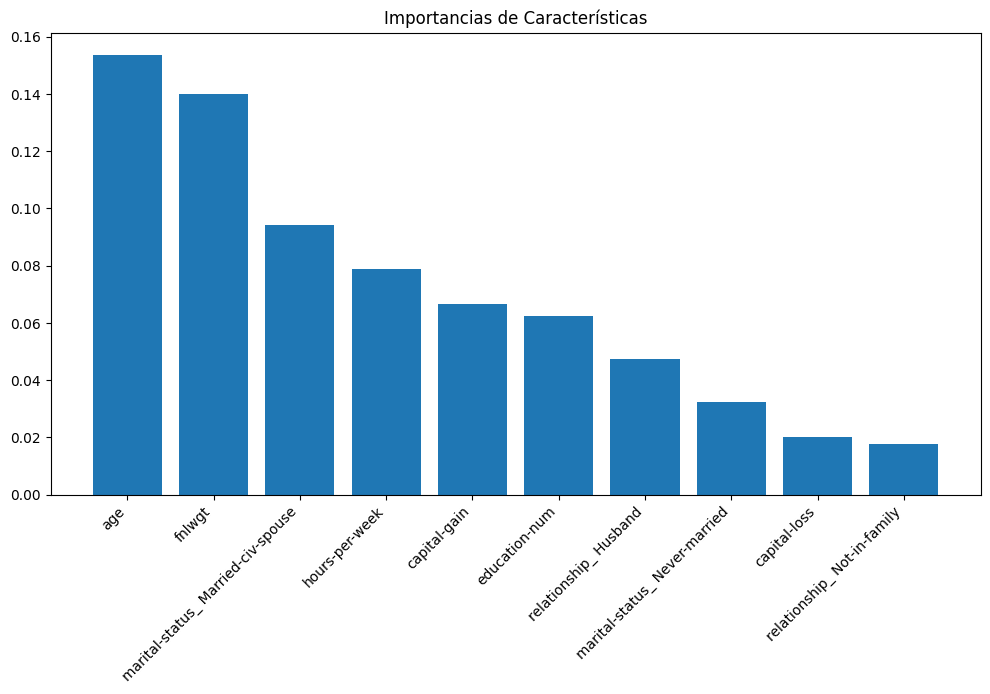

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_modelo.drop('object', axis=1)
y = df_modelo['object']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo RandomForestClassifier
modelo_rf = RandomForestClassifier(random_state=42)

# Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# Obtener importancias de características
importancias_caracteristicas = modelo_rf.feature_importances_

# Crear un DataFrame con las importancias de características y los nombres de las columnas
df_importancias = pd.DataFrame({'Caracteristica': X.columns, 'Importancia': importancias_caracteristicas})

# Ordenar el DataFrame por importancia de características en orden descendente
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

# Mostrar las 10 características más importantes
print(df_importancias.head(10))

# Graficar las importancias de características
plt.figure(figsize=(12, 6))
plt.bar(df_importancias['Caracteristica'][:10], df_importancias['Importancia'][:10])
plt.xticks(rotation=45, ha="right")
plt.title('Importancias de Características')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Seleccionar las mejores 6 características
mejores_caracteristicas = df_importancias['Caracteristica'][:6]

# Filtrar el conjunto de datos con las mejores características
X_seleccionado = X[mejores_caracteristicas]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_seleccionado, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo RandomForestClassifier
modelo_rf_seleccionado = RandomForestClassifier(random_state=42)
modelo_rf_seleccionado.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo_rf_seleccionado.predict(X_test)

# Evaluar el rendimiento del modelo
precision = accuracy_score(y_test, predicciones)
reporte_clasificacion = classification_report(y_test, predicciones)

# Mostrar resultados
print(f"Accuracy: {precision:.4f}")
print("\nReporte de Clasificación:")
print(reporte_clasificacion)


Accuracy: 0.9203

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      4907
           1       0.88      0.97      0.92      4981

    accuracy                           0.92      9888
   macro avg       0.92      0.92      0.92      9888
weighted avg       0.92      0.92      0.92      9888



### Usar grid search para buscar los mejores hiperparametros

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_modelo.drop('object', axis=1)
y = df_modelo['object']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo RandomForestClassifier
modelo_rf = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros que deseas ajustar
parametros = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(estimator=modelo_rf, param_grid=parametros, cv=5, scoring='accuracy')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
mejores_parametros = grid_search.best_params_

# Imprimir los mejores hiperparámetros
print("Mejores Hiperparámetros:")
print(mejores_parametros)

# Realizar predicciones en el conjunto de prueba utilizando el modelo con los mejores hiperparámetros
predicciones = grid_search.predict(X_test)

# Evaluar el rendimiento del modelo
precision = accuracy_score(y_test, predicciones)
reporte_clasificacion = classification_report(y_test, predicciones)

# Mostrar resultados
print(f"\nAccuracy con los mejores hiperparámetros: {precision:.4f}")
print("\nReporte de Clasificación:")
print(reporte_clasificacion)


Mejores Hiperparámetros:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Accuracy con los mejores hiperparámetros: 0.9332

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      4907
           1       0.90      0.98      0.94      4981

    accuracy                           0.93      9888
   macro avg       0.94      0.93      0.93      9888
weighted avg       0.94      0.93      0.93      9888



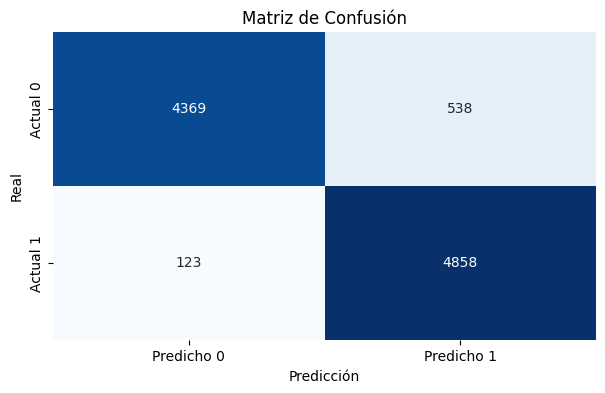

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, predicciones)

# Crear un DataFrame de la matriz de confusión para visualización
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicho 0', 'Predicho 1'])

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(7, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

## Conclusiones Analiticas

Se decidio hacer un oversampling de la data para emparejar la variable objetico, se realizaron 2 modelos para comparar un modelo simple con uno con un Grid Search, la diferencia entre ambos fue minina, solo un punto de Acc superior, los Mejores Hiperparámetros:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}